#### This notebook is to perform redundancy analysis for alpha-diversity

In [1]:
library(ggplot2)
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [2]:
data <- read.csv("MetaData.csv")
head(data)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>
1,BVC-1473-10-10,295,0.2786473,2.286182,1,0.75,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
2,BVC-1473-10-13,341,0.4057165,3.413548,2,2.00,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
3,BVC-1473-10-36,408,0.5631309,4.883711,3,3.00,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
4,BVC-1475-10-10,294,0.2419217,1.983678,1,0.75,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
5,BVC-1475-10-13,391,0.5142706,4.428397,2,2.00,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
6,BVC-1475-10-36,555,0.5257842,4.793230,3,3.00,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9


In [3]:
BetaRDAanalysis <- function(pcName, ctsName, catName, dat){
  dat[catName] = lapply(dat[catName], factor)
  dat[ctsName] = lapply(dat[ctsName], as.character)
  dat[ctsName] = lapply(dat[ctsName], as.numeric)
  df <- na.omit(dat)
  ind <- rownames(df)
  X <- df[, c(catName, ctsName)]
  Y <- df[, pcName]
  mod0 <- rda(Y ~ 1., X) 
  mod1 <- rda(Y ~ ., X) 
  step.res <- ordiR2step(mod0, mod1, perm.max = 1000)
  table = step.res$anova
  n <- nrow(table)
  if(is.null(n)) return(cat("No anova"))
  ES.RDA <- numeric(n-1)
  ES.RDA[1] <- table[1,1]
  for (i in 2:n){
    ES.RDA[i] <- table[i, 1] - table[i-1, 1]
  }
  table$ES.RDA <- ES.RDA
  table = table[-n, ]
  print(table)
  return(table)
}

In [4]:
pc = read.csv('tab_mGtax_qiita_min100k_332s_aitchison_DM.tsv', header=TRUE, sep='\t',row.names = 1)
pc <- pc[ , order(colnames(pc))]
pc <- pc[ order(rownames(pc)), ]
pc$collection_device_id <- rownames(pc)
pc$collection_device_id <- gsub(".", "-", pc$collection_device_id,fixed = T)
n <- ncol(pc)
pc <- pc[,c(n,1:(n-1))]
pc_10 = pc[, 1:11]
colnames(pc_10) = c('collection_device_id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
dim(pc_10)
head(pc_10)

[1] 332  11

,collection_device_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BVC.1473.10.10,BVC-1473-10-10,0.00000,55.00937,76.49274,52.91355,68.85571,76.30533,46.59130,62.93284,74.00980,52.41417
BVC.1473.10.13,BVC-1473-10-13,55.00937,0.00000,53.21168,52.78436,42.83283,57.61438,42.51577,37.33298,49.06176,51.57249
BVC.1473.10.36,BVC-1473-10-36,76.49274,53.21168,0.00000,65.96802,44.72315,48.58788,66.96215,46.68372,52.48699,67.48879
BVC.1475.10.10,BVC-1475-10-10,52.91355,52.78436,65.96802,0.00000,59.03980,70.19906,46.48805,53.01267,67.49188,52.00037
BVC.1475.10.13,BVC-1475-10-13,68.85571,42.83283,44.72315,59.03980,0.00000,48.22585,56.33834,40.71649,48.96040,60.90284
BVC.1475.10.36,BVC-1475-10-36,76.30533,57.61438,48.58788,70.19906,48.22585,0.00000,70.06898,53.58613,51.61882,74.80768


In [5]:
data = merge(data, pc_10, by='collection_device_id')

In [6]:
secctsName <- c("age_wk40", "income","mbmi")
seccatName <- c("csection")

In [7]:
pcName = c('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')

In [8]:
#all timepoints with categorical zscores
ctsName <- c("age_years", "days_exclusive_bf") 
catName <- c("sex","recent_antibiotic_use",
             "cogcmp_yr2_quartile", "langcmp_yr2_quartile", 
             "motorcmp_yr2_quartile", "soemocmp_yr2_quartile",
             "underwt_yr1", "waste_yr1", "stunting_yr1",
             "underwt_yr2", "waste_yr2", "stunting_yr2",
             "underwt_yr3", "waste_yr3", "stunting_yr3",
             "underwt_yr4", "waste_yr4", "stunting_yr4",
             "underwt_yr5", "waste_yr5", "stunting_yr5")
table <- BetaRDAanalysis(pcName, ctsName, catName, data)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                          R2.adjusted
<All variables>          0.5129163526
+ age_years              0.4155651095
+ recent_antibiotic_use  0.2974768054
+ underwt_yr2            0.0184934896
+ stunting_yr4           0.0120557910
+ stunting_yr3           0.0114930107
+ cogcmp_yr2_quartile    0.0096287102
+ stunting_yr2           0.0089764380
+ underwt_yr3            0.0051679814
+ days_exclusive_bf      0.0039328382
+ underwt_yr4            0.0034301423
+ underwt_yr5            0.0021061704
+ stunting_yr5           0.0016344473
+ motorcmp_yr2_quartile  0.0008600893
+ langcmp_yr2_quartile   0.0007852461
<none>                   0.0000000000
+ sex                   -0.0001083849
+ waste_yr1             -0.0015421164
+ underwt_yr1           -0.0017848389
+ soemocmp_yr2_quartile -0.0017970072
+ waste_yr3             -0.0027140704
+ stunting_yr1          -0.0038776647
+ waste_yr4             -0.0046507436
+ waste_yr5             -0.0050104553
+ waste_yr2       

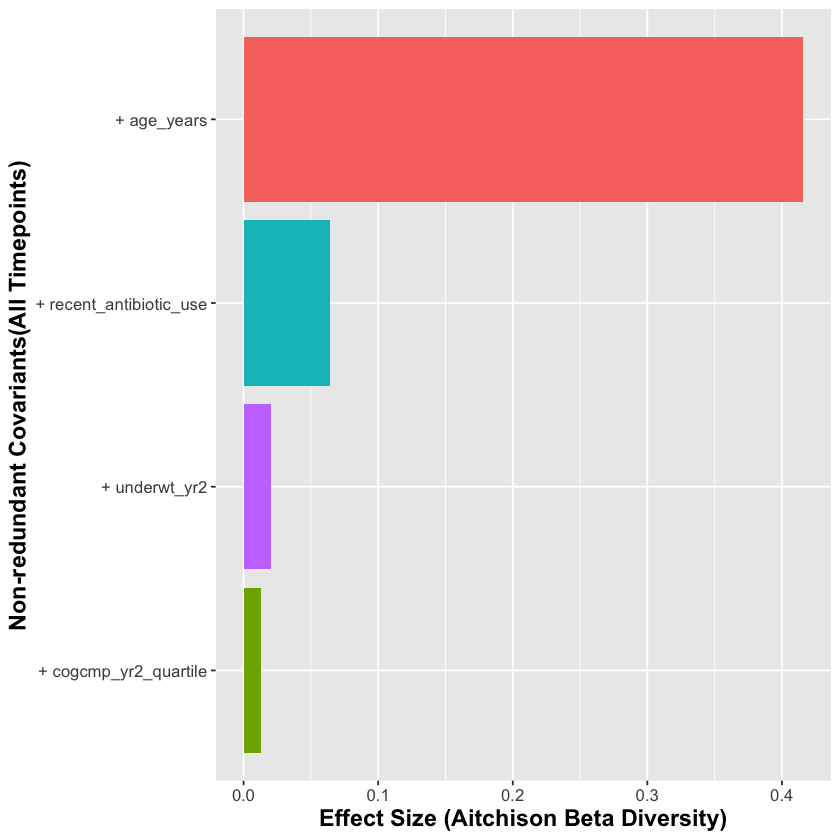

In [9]:
covariates = rownames(table)
ggplot(table, aes(x=reorder(covariates, ES.RDA), y=ES.RDA, fill=covariates)) +
  labs(x = 'Non-redundant Covariants(All Timepoints)', y = 'Effect Size (Aitchison Beta Diversity)') +
  geom_bar(stat='identity') +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14,face="bold"), 
        legend.position="none") + 
  coord_flip()

In [10]:
#all timepoints with secondary variables
table <- BetaRDAanalysis(pcName, c(ctsName,secctsName), c(catName, seccatName), data)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                          R2.adjusted
<All variables>          0.5113328161
+ age_years              0.4155651095
+ recent_antibiotic_use  0.2974768054
+ underwt_yr2            0.0184934896
+ stunting_yr4           0.0120557910
+ stunting_yr3           0.0114930107
+ cogcmp_yr2_quartile    0.0096287102
+ stunting_yr2           0.0089764380
+ underwt_yr3            0.0051679814
+ days_exclusive_bf      0.0039328382
+ underwt_yr4            0.0034301423
+ income                 0.0029560364
+ underwt_yr5            0.0021061704
+ stunting_yr5           0.0016344473
+ motorcmp_yr2_quartile  0.0008600893
+ langcmp_yr2_quartile   0.0007852461
<none>                   0.0000000000
+ sex                   -0.0001083849
+ csection              -0.0001905639
+ waste_yr1             -0.0015421164
+ underwt_yr1           -0.0017848389
+ soemocmp_yr2_quartile -0.0017970072
+ mbmi                  -0.0020469803
+ age_wk40              -0.0024790303
+ waste_yr3       

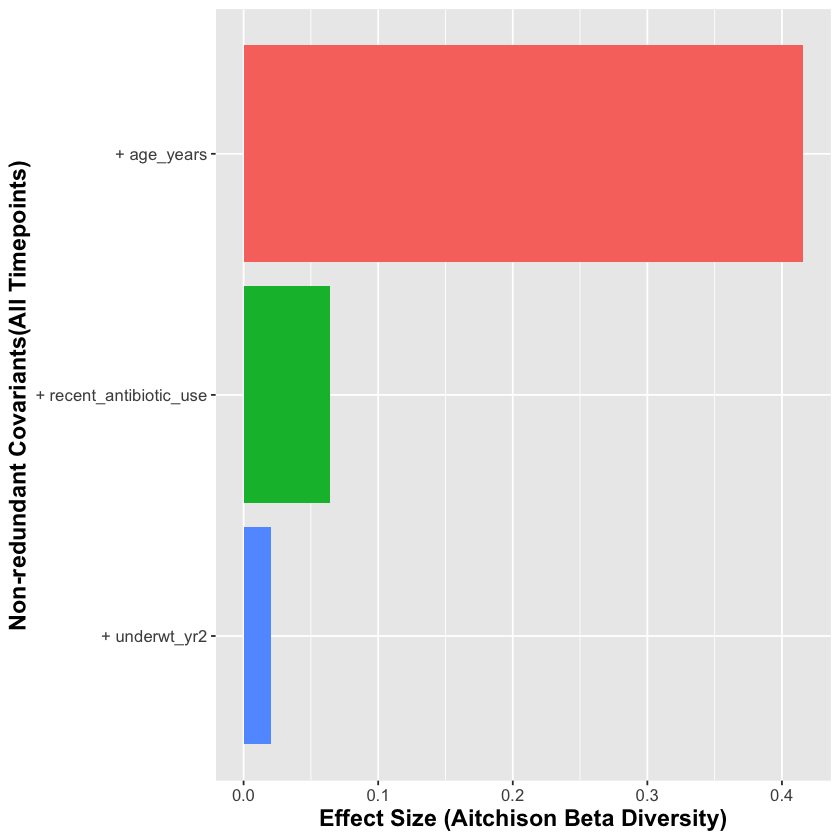

In [11]:
covariates = rownames(table)
ggplot(table, aes(x=reorder(covariates, ES.RDA), y=ES.RDA, fill=covariates)) +
  labs(x = 'Non-redundant Covariants(All Timepoints)', y = 'Effect Size (Aitchison Beta Diversity)') +
  geom_bar(stat='identity') +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14,face="bold"), 
        legend.position="none") + 
  coord_flip()

##### Timepoint 1

In [12]:
data <- read.csv("MetaData.csv")
tp1 <- data[data$time_point==1, ]
head(tp1)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>
1,BVC-1473-10-10,295,0.2786473,2.286182,1,0.75,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
4,BVC-1475-10-10,294,0.2419217,1.983678,1,0.75,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
7,BVC-1480-10-10,283,0.2985334,2.431452,1,0.75,116,85,86,85,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Control,No,0.78,7000,23.2
10,BVC-1481-10-10,213,0.3480514,2.692077,1,0.75,170,100,106,94,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Risk of Stunting,No,0.77,6000,18.3
14,BVC-1492-10-10,380,0.4377932,3.751824,1,0.75,115,100,106,97,⋯,Risk of Underweight,Risk of wasting,Control,Risk of Underweight,Risk of wasting,Control,Yes,0.78,18000,22.8
16,BVC-1499-10-10,502,0.5169127,4.637505,1,0.75,186,85,89,88,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Control,Stunting,No,0.77,5000,18.8


In [13]:
pc = read.csv('tab_mGtax_qiita_min100k_332s_aitchison_DM_aitchison_timepoint_months_9.tsv', header=TRUE, sep='\t',row.names = 1)
pc <- pc[ , order(colnames(pc))]
pc <- pc[ order(rownames(pc)), ]
pc$collection_device_id <- rownames(pc)
pc$collection_device_id <- gsub(".", "-", pc$collection_device_id,fixed = T)
n <- ncol(pc)
pc <- pc[,c(n,1:(n-1))]
pc_10 = pc[, 1:11]
colnames(pc_10) = c('collection_device_id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
dim(pc_10)
head(pc_10)

[1] 112  11

,collection_device_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BVC.1473.10.10,BVC-1473-10-10,0.00000,52.91355,46.59130,52.41417,57.32478,62.02163,64.51484,56.74726,50.53105,63.81828
BVC.1475.10.10,BVC-1475-10-10,52.91355,0.00000,46.48805,52.00037,56.34820,59.68582,51.80799,50.70961,57.69523,59.60589
BVC.1480.10.10,BVC-1480-10-10,46.59130,46.48805,0.00000,48.50269,53.47931,60.26531,48.69404,47.99250,50.52870,59.86286
BVC.1481.10.10,BVC-1481-10-10,52.41417,52.00037,48.50269,0.00000,58.13543,59.23165,58.51161,58.57450,63.23332,60.94515
BVC.1492.10.10,BVC-1492-10-10,57.32478,56.34820,53.47931,58.13543,0.00000,59.85720,59.76714,57.40844,61.98342,68.08338
BVC.1499.10.10,BVC-1499-10-10,62.02163,59.68582,60.26531,59.23165,59.85720,0.00000,61.08001,56.81326,70.76470,60.34488


In [14]:
tp1 = merge(tp1, pc_10, by='collection_device_id')
head(tp1)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,BVC-1473-10-10,295,0.2786473,2.286182,1,0.75,121,90,86,88,⋯,0.00000,52.91355,46.59130,52.41417,57.32478,62.02163,64.51484,56.74726,50.53105,63.81828
2,BVC-1475-10-10,294,0.2419217,1.983678,1,0.75,128,85,100,97,⋯,52.91355,0.00000,46.48805,52.00037,56.34820,59.68582,51.80799,50.70961,57.69523,59.60589
3,BVC-1480-10-10,283,0.2985334,2.431452,1,0.75,116,85,86,85,⋯,46.59130,46.48805,0.00000,48.50269,53.47931,60.26531,48.69404,47.99250,50.52870,59.86286
4,BVC-1481-10-10,213,0.3480514,2.692077,1,0.75,170,100,106,94,⋯,52.41417,52.00037,48.50269,0.00000,58.13543,59.23165,58.51161,58.57450,63.23332,60.94515
5,BVC-1492-10-10,380,0.4377932,3.751824,1,0.75,115,100,106,97,⋯,57.32478,56.34820,53.47931,58.13543,0.00000,59.85720,59.76714,57.40844,61.98342,68.08338
6,BVC-1499-10-10,502,0.5169127,4.637505,1,0.75,186,85,89,88,⋯,62.02163,59.68582,60.26531,59.23165,59.85720,0.00000,61.08001,56.81326,70.76470,60.34488


In [15]:
#categorical zscore
ctsName <- c("days_exclusive_bf") 
catName <- c("sex", "recent_antibiotic_use", "underwt_yr1", "waste_yr1", "stunting_yr1")
table <- BetaRDAanalysis(pcName, ctsName, catName, tp1)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                          R2.adjusted
+ days_exclusive_bf      0.0188052135
<All variables>          0.0141966365
+ underwt_yr1            0.0081447066
+ recent_antibiotic_use  0.0039239064
+ sex                    0.0002114726
<none>                   0.0000000000
+ waste_yr1             -0.0006752583
+ stunting_yr1          -0.0064657344

No anova

In [16]:
#with secondary variables
table <- BetaRDAanalysis(pcName, c(ctsName,secctsName), c(catName, seccatName), tp1)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                          R2.adjusted
+ days_exclusive_bf      0.0188052135
+ csection               0.0087343690
+ underwt_yr1            0.0081447066
<All variables>          0.0069186600
+ income                 0.0064898596
+ recent_antibiotic_use  0.0039239064
+ sex                    0.0002114726
<none>                   0.0000000000
+ waste_yr1             -0.0006752583
+ stunting_yr1          -0.0064657344
+ mbmi                  -0.0072320177
+ age_wk40              -0.0077847311

No anova

##### Timepoint 2

In [17]:
data <- read.csv("MetaData.csv")
tp2 <- data[data$time_point==2, ]
head(tp2)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>
2,BVC-1473-10-13,341,0.4057165,3.413548,2,2,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
5,BVC-1475-10-13,391,0.5142706,4.428397,2,2,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
8,BVC-1480-10-13,332,0.5008089,4.194295,2,2,116,85,86,85,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Control,No,0.78,7000,23.2
11,BVC-1481-10-13,363,0.4678691,3.978677,2,2,170,100,106,94,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Risk of Stunting,No,0.77,6000,18.3
12,BVC-1487-10-13,353,0.4681096,3.961857,2,2,148,90,100,94,⋯,Underweight,Wasting,Risk of Stunting,Underweight,Wasting,Control,Yes,0.77,14000,18.1
15,BVC-1492-10-13,426,0.4584735,4.004633,2,2,115,100,106,97,⋯,Risk of Underweight,Risk of wasting,Control,Risk of Underweight,Risk of wasting,Control,Yes,0.78,18000,22.8


In [18]:
pc = read.csv('tab_mGtax_qiita_min100k_332s_aitchison_DM_aitchison_timepoint_months_24.tsv', header=TRUE, sep='\t',row.names = 1)
pc <- pc[ , order(colnames(pc))]
pc <- pc[ order(rownames(pc)), ]
pc$collection_device_id <- rownames(pc)
pc$collection_device_id <- gsub(".", "-", pc$collection_device_id,fixed = T)
n <- ncol(pc)
pc <- pc[,c(n,1:(n-1))]
pc_10 = pc[, 1:11]
colnames(pc_10) = c('collection_device_id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')
dim(pc_10)
head(pc_10)

[1] 114  11

,collection_device_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BVC.1473.10.13,BVC-1473-10-13,0.00000,42.83283,37.33298,36.90459,34.57440,43.03978,37.78209,40.85026,43.51316,45.43977
BVC.1475.10.13,BVC-1475-10-13,42.83283,0.00000,40.71649,50.30161,42.36385,51.92683,40.19341,41.55268,50.54259,48.98541
BVC.1480.10.13,BVC-1480-10-13,37.33298,40.71649,0.00000,43.21001,36.64185,44.80131,38.06934,39.80412,44.54086,44.99825
BVC.1481.10.13,BVC-1481-10-13,36.90459,50.30161,43.21001,0.00000,44.88261,50.30281,45.87573,48.65563,44.90714,52.35164
BVC.1487.10.13,BVC-1487-10-13,34.57440,42.36385,36.64185,44.88261,0.00000,46.18424,38.40742,40.44190,46.44261,47.79406
BVC.1492.10.13,BVC-1492-10-13,43.03978,51.92683,44.80131,50.30281,46.18424,0.00000,43.44857,40.72520,48.01259,46.93034


In [19]:
tp2 = merge(tp2, pc_10, by='collection_device_id')

In [20]:
#categorical zscore
ctsName <- c("days_exclusive_bf") 
catName <- c("sex", "recent_antibiotic_use", "underwt_yr2",	"waste_yr2", "stunting_yr2",
             "cogcmp_yr2_quartile", "langcmp_yr2_quartile", 
             "motorcmp_yr2_quartile", "soemocmp_yr2_quartile")
table <- BetaRDAanalysis(pcName, ctsName, catName, tp2)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                          R2.adjusted
<All variables>          0.0908411633
+ underwt_yr2            0.0731678805
+ cogcmp_yr2_quartile    0.0407551030
+ langcmp_yr2_quartile   0.0176825108
+ days_exclusive_bf      0.0115805425
+ soemocmp_yr2_quartile  0.0102147567
+ waste_yr2              0.0084139785
+ recent_antibiotic_use  0.0078290066
<none>                   0.0000000000
+ motorcmp_yr2_quartile -0.0002802133
+ stunting_yr2          -0.0002819860
+ sex                   -0.0065073808

              Df    AIC      F Pr(>F)   
+ underwt_yr2  2 734.12 5.4603  0.002 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.07316788 
Call: Y ~ underwt_yr2 
 
                        R2.adjusted
+ cogcmp_yr2_quartile    0.10374184
+ langcmp_yr2_quartile   0.09630768
<All variables>          0.09084116
+ soemocmp_yr2_quartile  0.08469737
+ recent_antibiotic_use  0.07696043
+ motorcmp_yr2_quartile  0.07635783
+ stunting_yr2      

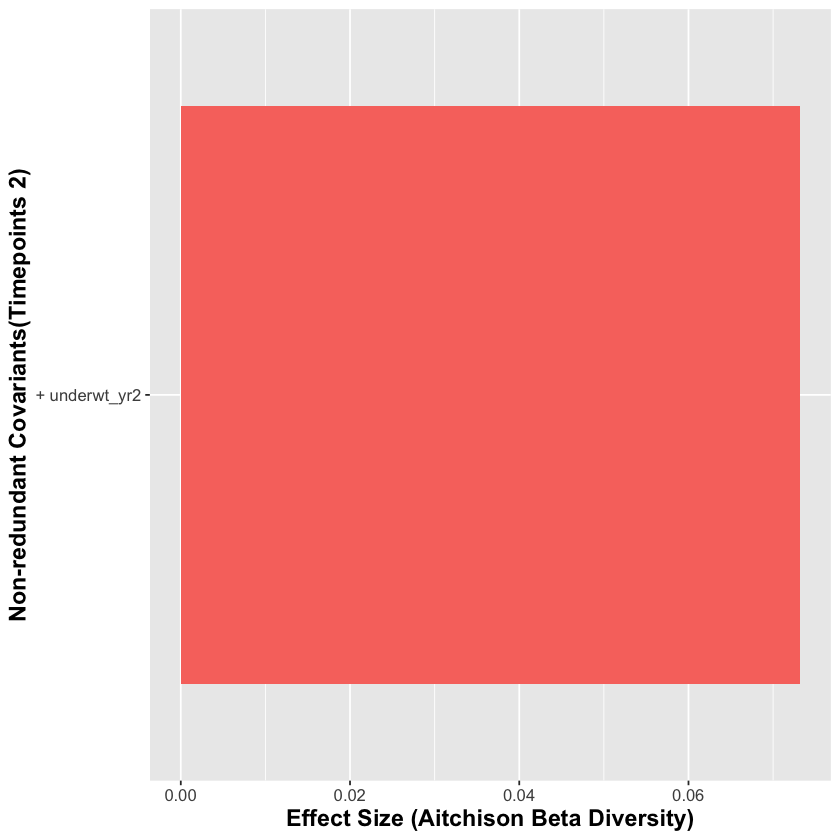

In [21]:
covariates = rownames(table)
ggplot(table, aes(x=reorder(covariates, ES.RDA), y=ES.RDA, fill=covariates)) +
  labs(x = 'Non-redundant Covariants(Timepoints 2)', y = 'Effect Size (Aitchison Beta Diversity)') +
  geom_bar(stat='identity') +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14,face="bold"), 
        legend.position="none") + 
  coord_flip()

In [22]:
#categorical zscore with secondary variables
table <- BetaRDAanalysis(pcName, c(ctsName,secctsName), c(catName, seccatName), tp2)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                          R2.adjusted
<All variables>          0.1038024088
+ underwt_yr2            0.0731678805
+ cogcmp_yr2_quartile    0.0407551030
+ langcmp_yr2_quartile   0.0176825108
+ days_exclusive_bf      0.0115805425
+ soemocmp_yr2_quartile  0.0102147567
+ income                 0.0090466070
+ waste_yr2              0.0084139785
+ recent_antibiotic_use  0.0078290066
+ age_wk40               0.0005581880
<none>                   0.0000000000
+ motorcmp_yr2_quartile -0.0002802133
+ stunting_yr2          -0.0002819860
+ csection              -0.0006509728
+ mbmi                  -0.0054417607
+ sex                   -0.0065073808

              Df    AIC      F Pr(>F)   
+ underwt_yr2  2 734.12 5.4603  0.002 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.07316788 
Call: Y ~ underwt_yr2 
 
                        R2.adjusted
<All variables>          0.10380241
+ cogcmp_yr2_quartile    0.10374184
+ langcmp_yr

##### Timepoint 3

In [23]:
tp3 <- data[data$time_point==3, ]
head(tp3)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>
3,BVC-1473-10-36,408,0.5631309,4.883711,3,3,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
6,BVC-1475-10-36,555,0.5257842,4.793230,3,3,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
9,BVC-1480-10-36,494,0.4074098,3.645652,3,3,116,85,86,85,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Control,No,0.78,7000,23.2
13,BVC-1487-10-36,493,0.5255913,4.701648,3,3,148,90,100,94,⋯,Underweight,Wasting,Risk of Stunting,Underweight,Wasting,Control,Yes,0.77,14000,18.1
18,BVC-1499-10-36,371,0.4372548,3.732090,3,3,186,85,89,88,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Control,Stunting,No,0.77,5000,18.8
21,BVC-1500-10-36,328,0.3575104,2.987912,3,3,168,80,94,85,⋯,Risk of Underweight,Control,Risk of Stunting,Risk of Underweight,Risk of wasting,Risk of Stunting,No,0.77,4800,20.0


In [24]:
pc = read.csv('tab_mGtax_qiita_min100k_332s_aitchison_DM_aitchison_timepoint_months_36.tsv', header=TRUE, sep='\t',row.names = 1)
pc <- pc[ , order(colnames(pc))]
pc <- pc[ order(rownames(pc)), ]
pc$collection_device_id <- rownames(pc)
pc$collection_device_id <- gsub(".", "-", pc$collection_device_id,fixed = T)
n <- ncol(pc)
pc <- pc[,c(n,1:(n-1))]
pc_10 = pc[, 1:11]
colnames(pc_10) = c('collection_device_id', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10')

In [25]:
tp3 = merge(tp3, pc_10, by='collection_device_id')

In [26]:
#categorical zscore
#remove recent_antibiotic_use because not collected for all samples
ctsName <- c("days_exclusive_bf", "ageyr3_mulcog") 
catName <- c("sex","underwt_yr3", "waste_yr3", "stunting_yr3")
table <- BetaRDAanalysis(pcName, ctsName, catName, tp3)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                     R2.adjusted
<All variables>      0.035396818
+ stunting_yr3       0.034962265
+ underwt_yr3        0.028494689
+ ageyr3_mulcog      0.003627636
+ days_exclusive_bf  0.000734202
<none>               0.000000000
+ sex               -0.007109978
+ waste_yr3         -0.009919696

               Df    AIC     F Pr(>F)   
+ stunting_yr3  2 673.81 2.902   0.01 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.03496227 
Call: Y ~ stunting_yr3 
 
                    R2.adjusted
+ ageyr3_mulcog      0.04489274
<All variables>      0.03539682
<none>               0.03496227
+ days_exclusive_bf  0.03362241
+ underwt_yr3        0.03213411
+ waste_yr3          0.03017299
+ sex                0.02769683

                 R2.adj Df    AIC     F Pr(>F)   ES.RDA
+ stunting_yr3 0.034962  2 673.81 2.902   0.01 0.034962


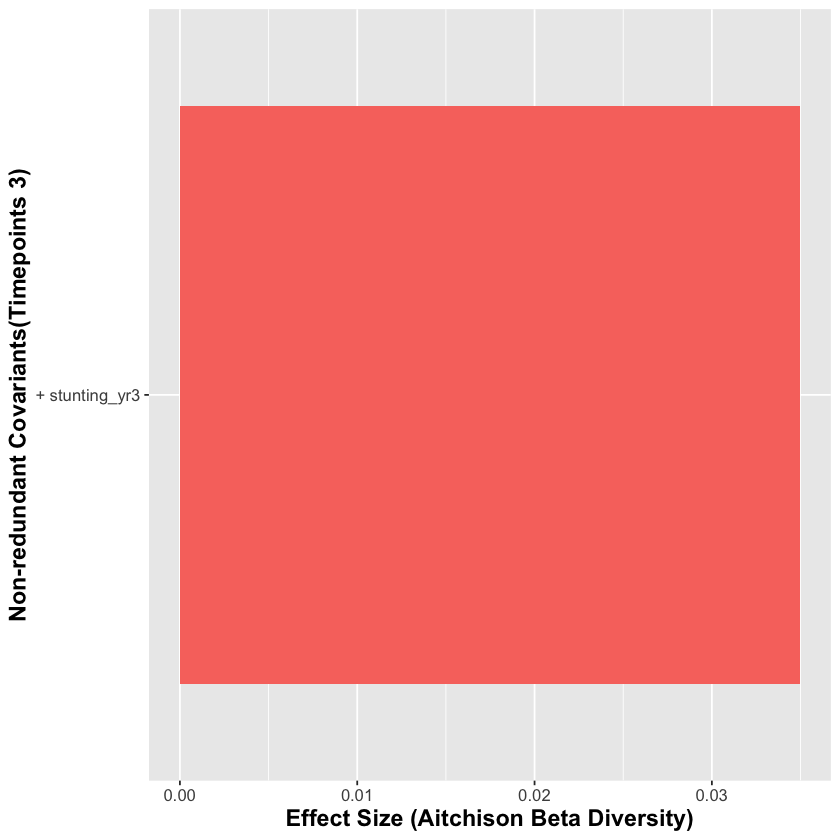

In [27]:
covariates = rownames(table)
ggplot(table, aes(x=reorder(covariates, ES.RDA), y=ES.RDA, fill=covariates)) +
  labs(x = 'Non-redundant Covariants(Timepoints 3)', y = 'Effect Size (Aitchison Beta Diversity)') +
  geom_bar(stat='identity') +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14,face="bold"), 
        legend.position="none") + 
  coord_flip()

In [28]:
#categorical zscore with secondary variables
table <- BetaRDAanalysis(pcName, c(ctsName,secctsName), c(catName, seccatName), tp3)

Step: R2.adj= 0 
Call: Y ~ 1 
 
                     R2.adjusted
<All variables>      0.040606943
+ stunting_yr3       0.034962265
+ underwt_yr3        0.028494689
+ income             0.021394849
+ mbmi               0.005879983
+ ageyr3_mulcog      0.003627636
+ days_exclusive_bf  0.000734202
<none>               0.000000000
+ age_wk40          -0.001641814
+ csection          -0.004523847
+ sex               -0.007109978
+ waste_yr3         -0.009919696

               Df    AIC     F Pr(>F)  
+ stunting_yr3  2 673.81 2.902  0.012 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.03496227 
Call: Y ~ stunting_yr3 
 
                    R2.adjusted
+ ageyr3_mulcog      0.04489274
+ income             0.04471270
<All variables>      0.04060694
<none>               0.03496227
+ mbmi               0.03391036
+ age_wk40           0.03367427
+ days_exclusive_bf  0.03362241
+ underwt_yr3        0.03213411
+ waste_yr3          0.03017299
+ csection        